# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [172]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
#hide
df_all = read_api()
df_all.index.name = 'date'
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
#df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [174]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [175]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Crypto Tech In 2021: Focus on Scalability, Privacy and Usability.  Among other things, cryptocurrency is also fintech, financial technology. With bitcoin (BTC) hitting its highest ever market capitalization in November, the financial part of this combination has received plenty of attention in recent months, but what about the technology part?While they don’t quite make as many headlines as price rises (and falls), developers associated ... [| Skaityti daugiau](https://cryptonews.com/exclusives/crypto-tech-in-2021-focus-on-scalability-privacy-and-usabili-8453.htm) 

In [176]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Moderna: Covid vaccine shows nearly 95% protection.  The results add to growing confidence that vaccination can end the pandemic. ... [| Skaityti daugiau](https://www.bbc.co.uk/news/health-54902908) 

### Kainų kaita pandemijos metu

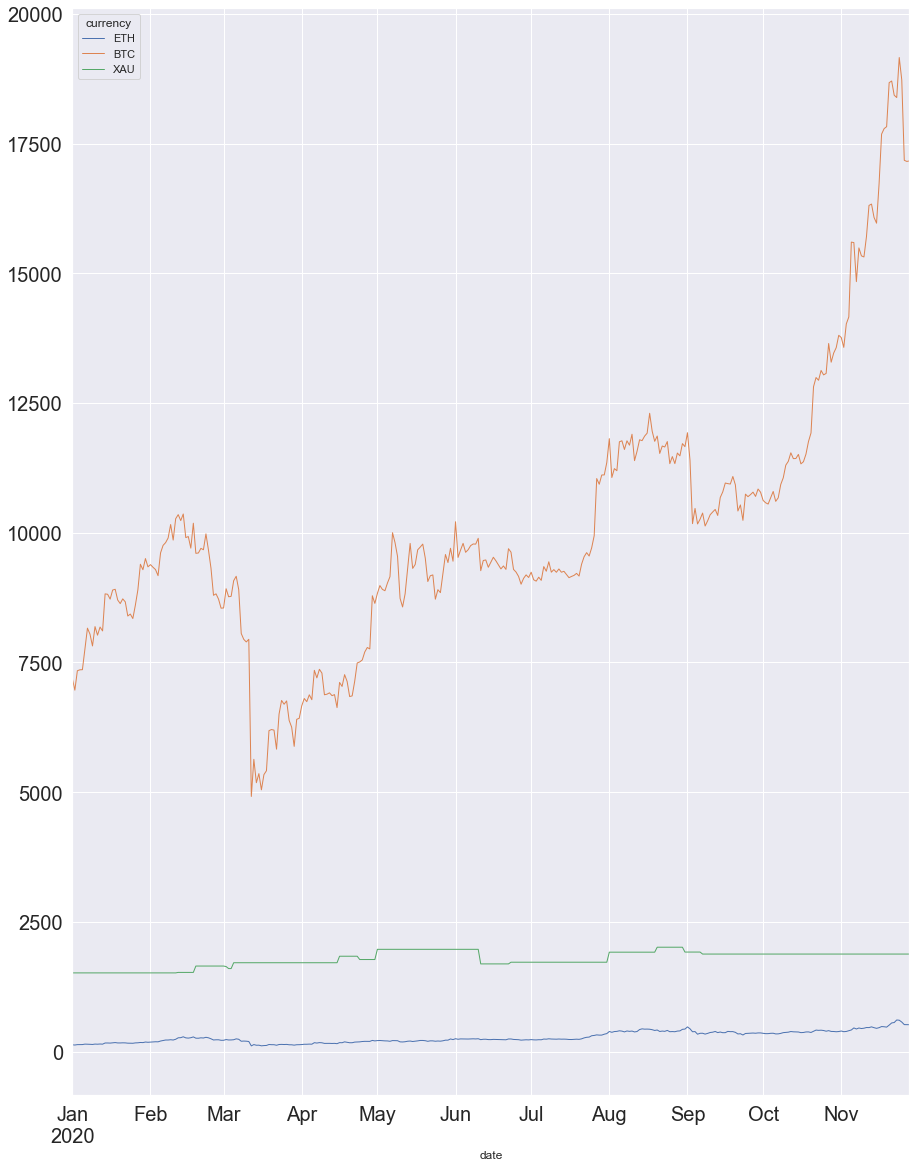

In [177]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [178]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU
currency,,,
ETH,1.000000,0.917866,0.556821
BTC,0.917866,1.000000,0.425444
XAU,0.556821,0.425444,1.000000


Koreliacijos matrica.

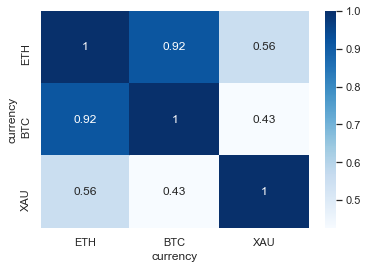

In [167]:
#hide_input
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')